## INTRODUCTION

Instacart is a grocery delivery platform where customers can place an order and have it delivered, similar to Uber Eats and DoorDash. This particular dataset was publicly released by Instacart in 2017 for a Kaggle competition. Nevertheless, the dataset we are going to work was  modified from the original by ___TrippleTen - Data Scientis Course___. The size of the dataset has been reduced to do the calculations faster and as a practice, and missing and duplicate values were introduced. The distributions were preserve from the original data when making these changes.

The task of this projecto is to clean the data and prepare a report that provides ___insights into the shopping habits of Instacart customers___. In addition there are some questions that need to be clarify and requests:

Requests (Charts)
- A graphic to visualize the orders placed by hour.
- A distribution chart to know how many days do customers take to purchase again
- A graphic to know what day of the week a customer place an order.

Questions 

- Is there a difference between orders placed on Wednesday and Saturday?
- How many orders has each customer placed?
- What are the Top 20 best-selling products?
- How many products are purchased per order by customers? 
- What are the top 20 most reordered items?
- What proportion of each item is reordered?
- What is the proportion of ordered products that are reordered for each customer?
- What are the top 20 items that people add to their carts first?

## DATA DESCRIPTION 
Here we have a brief description aobut each field

- instacart_orders.csv: Each row corresponds to an order in the Instacart app.
    - 'order_id': ID number that uniquely identifies each order.
    - 'user_id': ID number that uniquely identifies each customer's account.
    - 'order_number': The number of times this customer has placed an order.
    - 'order_dow': Day of the week the order was placed (0 for Sunday).
    - 'order_hour_of_day': Hour of the day the order was placed.
    - 'days_since_prior_order': Number of days since the customer made their previous order.

- products.csv: Each row corresponds to a unique product that customers can purchase.
    - 'product_id': ID number that uniquely identifies each product.
    - 'product_name': Name of the product.
    - 'aisle_id': ID number that uniquely identifies each grocery aisle category.
    - 'department_id': ID number that uniquely identifies each grocery department.

- order_products.csv: Each row corresponds to an item ordered in an order.

    - 'order_id': ID number that uniquely identifies each order.
    - 'product_id': ID number that uniquely identifies each product.
    - 'add_to_cart_order': The sequential order in which each item was added to the cart.
    - 'reordered': 0 if the customer has never ordered this product before, 1 if they have.

- aisles.csv:
    - 'aisle_id': ID number that uniquely identifies each grocery aisle category.
    - 'aisle': Name of the aisle.

- departments.csv:
    - 'department_id': ID number that uniquely identifies each grocery department.
    - 'department': Name of the department.

___WORK PLAN___

1. Import the pandas library.
2. Store the DataFrames in descriptive variables.
3. Read the DataFrames and identify if they have a header row and the type of separator used.
4. Make the necessary adjustments to correctly read the data.
5. Quickly check for missing values and verify if the displayed values correspond to their correct data type.

In [2]:
import pandas as pd
from matplotlib import pyplot as plt

In [3]:
# The dataset is a semicolon-delimited CSV
instacart_orders = pd.read_csv('instacart_orders.csv',sep=';')
products = pd.read_csv('products.csv',sep=';')
order_products = pd.read_csv('order_products.csv',sep=';')
aisles = pd.read_csv('aisles.csv',sep=';')
departments = pd.read_csv('departments.csv',sep=';')

In [4]:
# Orders
print('Duplicate values:', instacart_orders.duplicated().sum(),'\n')
instacart_orders.info(show_counts=True)
print()
instacart_orders.head()

Duplicate values: 15 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB



,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1515936,183418,11,6,13,30.0
1,1690866,163593,5,5,12,9.0
2,1454967,39980,4,5,19,2.0
3,1768857,82516,56,0,20,10.0
4,3007858,196724,2,4,12,17.0


In [5]:
# Products
print('Duplicate values:', products.duplicated().sum(),'\n')
products.info(show_counts=True)
print()
products.head()

Duplicate values: 0 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB



,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [6]:
# Order_Products
print('Duplicate values:', order_products.duplicated().sum(),'\n')
order_products.info(show_counts=True)
print()
order_products.head()

Duplicate values: 0 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   order_id           4545007 non-null  int64  
 1   product_id         4545007 non-null  int64  
 2   add_to_cart_order  4544171 non-null  float64
 3   reordered          4545007 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB



,order_id,product_id,add_to_cart_order,reordered
0,2141543,11440,17.0,0
1,567889,1560,1.0,1
2,2261212,26683,1.0,1
3,491251,8670,35.0,1
4,2571142,1940,5.0,1


In [7]:
# Aisles
print('Duplicate values:', aisles.duplicated().sum(),'\n')
aisles.info(show_counts=True)
print()
aisles.head()

Duplicate values: 0 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB



,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [8]:
# Deparments
print('Duplicate values:', departments.duplicated().sum(),'\n')
departments.info(show_counts=True)
print()
departments.head()

Duplicate values: 0 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 468.0+ bytes



,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


REMARKS

- The data sets can be linked by their Primary/Foreing key.
- Some field's datatype can be cahnge based on their description. 
- There is missing values and possible duplicates (Implicit/Explicit)
- We have category tables such as ___deparment and aisle___

## PRE-PROCESSING

WORK PLAN

1. Verify if there are rows with explicit or implicit values depending on the data type.
2. Remove any duplicate data from the DataFrame.
3. Check that no duplicates remain.
4. Identify missing values and fill them as appropriate for each DataFrame.
5. Verify that there are no remaining missing values.



### ORDERS

In [9]:
# Removing duplicates
print('Duplicate values - Before:', instacart_orders.duplicated().sum())
instacart_orders.drop_duplicates(inplace=True)
instacart_orders.reset_index()
print('Duplicate values - After:', instacart_orders.duplicated().sum())

Duplicate values - Before: 15
Duplicate values - After: 0


REMARKS

- All the values in this table are numeric, so there should not be implicit duplicates

### PRODUCTS

In [10]:
# Showing duplicates
print(f"Duplicate values - Before: {products.duplicated().sum()} \n")

# No NaN duplicates products names
names = products[~products['product_name'].isna()]['product_name'].str.upper().duplicated().sum()
print(f"No NaN duplicate names: {names}")

# NaN duplipactes
nan_names = products['product_name'].isna().sum()
print(f"Nan duplicate values: {nan_names}")

# Unique product names
print(f"Unique produc names: {products['product_name'].str.upper().nunique()}")


Duplicate values - Before: 0 

No NaN duplicate names: 104
Nan duplicate values: 1258
Unique produc names: 48332


REMARKS

- There are no explicit duplicates; however, there are NaN values that should be reviewed before deciding whether to remove or fill them. Eventhough there are duplicate values (104) in this table, that does not necessarily means those are implicit duplicates. As an example we have found the product ___'HIGH PERFORMANCE ENERGY DRINK'___ which the only difference is the pdoruct_id number. 

In [11]:
products[products['product_name'] == 'HIGH PERFORMANCE ENERGY DRINK']

,product_id,product_name,aisle_id,department_id
49689,49690,HIGH PERFORMANCE ENERGY DRINK,64,7


In [12]:
# Showing NaN data
products[products['product_name'].isna()]

,product_id,product_name,aisle_id,department_id
37,38,NaN,100,21
71,72,NaN,100,21
109,110,NaN,100,21
296,297,NaN,100,21
416,417,NaN,100,21
...,...,...,...,...
49552,49553,NaN,100,21
49574,49575,NaN,100,21
49640,49641,NaN,100,21
49663,49664,NaN,100,21


In [13]:
# Getting groups by aisle
products[products['product_name'].isna()].groupby('aisle_id').count()

,product_id,product_name,department_id
aisle_id,,,
100,1258,0,1258


In [14]:
# Getting groups by deparment
products[products['product_name'].isna()].groupby('department_id').count()

,product_id,product_name,aisle_id
department_id,,,
21,1258,0,1258


In [15]:
# Reviewing data in table deparments
departments[departments['department_id'] == 21]

,department_id,department
20,21,missing


In [16]:
# Reviewing data in aisles deparments
aisles[aisles['aisle_id'] == 100]

,aisle_id,aisle
99,100,missing


REMAKRS

- All NaN values correspond to the same deparment/aisle "___missing___". In this case we are going to preserve the data changing the NaN values for "unknown"

In [17]:
# Filling missing data
products['product_name'].fillna('unknown',inplace=True)

products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   49694 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


### DEPARTMENTS

In [18]:
# Showing duplicates
print('Duplicate values - Before:', departments.duplicated().sum())

Duplicate values - Before: 0


In [19]:
# ID duplicates
print('ID duplicate values:', departments['department_id'].duplicated().sum())

ID duplicate values: 0


REMARKS

- Regarding the last three tables, no duplicates were found to address or take action.

### AISLES

In [20]:
# Showing duplicates
print('Duplicate values - Before:', aisles.duplicated().sum())

Duplicate values - Before: 0


In [21]:
# ID duplicates
print('ID duplicate values:', aisles['aisle_id'].duplicated().sum())

ID duplicate values: 0


REMARKS

- Regarding the last three tables, no duplicates were found to address or take action.

### ORDERS_PRODUCTS

In [22]:
# Showing duplicates
print('Duplicate values - Before:', order_products.duplicated().sum())

Duplicate values - Before: 0


In [23]:
# Missing values
cart_order_NaN = order_products[order_products['add_to_cart_order'].isna()]
cart_order_NaN

,order_id,product_id,add_to_cart_order,reordered
737,2449164,5068,NaN,0
9926,1968313,43867,NaN,0
14394,2926893,11688,NaN,0
16418,1717990,4142,NaN,0
30114,1959075,42828,NaN,1
...,...,...,...,...
4505662,1800005,7411,NaN,0
4511400,1633337,260,NaN,0
4517562,404157,9517,NaN,0
4534112,1673227,17835,NaN,0


In [24]:
max_value = order_products['add_to_cart_order'].max()
min_value = order_products['add_to_cart_order'].min()

print("Min value: {}\nMax value: {}".format(min_value,max_value))

Min value: 1.0
Max value: 64.0


REMAKRS

- There might be something related to the number 64 which is the max items ordered. 

In [25]:
# Getting a order_id list with NaN
order_NaN_list = cart_order_NaN['order_id'].unique()
missing_orders = order_products[order_products['order_id'].isin(order_NaN_list)]
missing_orders_by_id = missing_orders[['order_id','product_id']].groupby('order_id').count().reset_index()

print(f"Min products value: {missing_orders_by_id['product_id'].min()}")

# Showing filtered table
missing_orders_by_id.sort_values(by='product_id',ascending= True)

Min products value: 65


,order_id,product_id
0,9310,65
13,747668,65
32,1598369,65
37,1677118,65
50,2170451,65
...,...,...
45,1959075,98
5,171934,104
49,2136777,108
67,3308010,115


REMAKRS

- We have found the reason of NaN is because the information can not display values greater than 64, this could be for any reason, we are going to replace NaN for 999 

In [26]:
# Filling NaN
order_products['add_to_cart_order'].fillna(999,inplace=True)

# Changing datatype to int64
order_products['add_to_cart_order'] = order_products['add_to_cart_order'].astype('int64')
order_products.info()

print("\nNaN total values:",order_products['add_to_cart_order'].isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Dtype
---  ------             -----
 0   order_id           int64
 1   product_id         int64
 2   add_to_cart_order  int64
 3   reordered          int64
dtypes: int64(4)
memory usage: 138.7 MB

NaN total values: 0


C:\Users\JoseC\AppData\Local\Temp\ipykernel_17108\3520763129.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  order_products['add_to_cart_order'].fillna(999,inplace=True)


### INSTACART_ORDERS

In [27]:
# Reviewing the consistency of 'order_hour_of_day' data values
hour_min = instacart_orders['order_hour_of_day'].min()
hour_max = instacart_orders['order_hour_of_day'].max()

print("Min Hour: {}, Max Hour: {}".format(hour_min,hour_max))

Min Hour: 0, Max Hour: 23


In [28]:
# Reviewing the consistency of 'order_dow' data values
day_min = instacart_orders['order_dow'].min()
day_max = instacart_orders['order_dow'].max()

print("Range from {} to {} days".format(day_min,day_max))

Range from 0 to 6 days


In [29]:
# Reviewing NaN of 'days_since_prior_order'
instacart_orders[instacart_orders['days_since_prior_order'].isna()].groupby('order_number').count()

,order_id,user_id,order_dow,order_hour_of_day,days_since_prior_order
order_number,,,,,
1,28817,28817,28817,28817,0


REMAKRS

- In this case, all NaN values indicate that this is the customer's first order. However, we cannot replace the NaN values, as the field days_since_prior_order was designed for a different purpose

## REQUESTS

1. A graphic to visualize the orders placed by hour.
2. A distribution chart to know how many days do customers take to purchase again
3. A graphic to know what day of the week a customer place an order.

### Orders placed by hour

<Axes: title={'center': 'Orders per hour'}, xlabel='Hour of the day', ylabel='Orders #'>

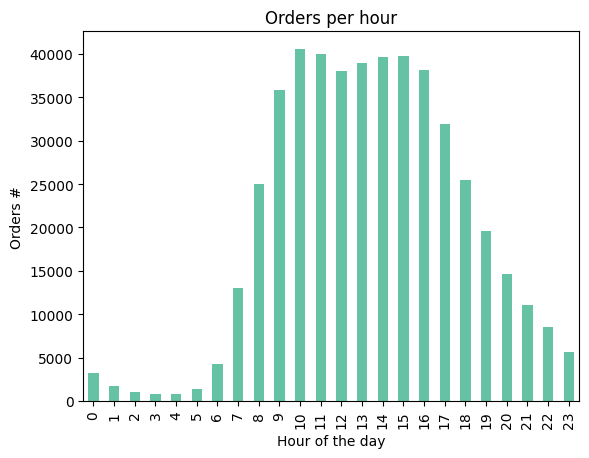

In [30]:
# Request 1
orders_per_hour = instacart_orders.groupby('order_hour_of_day')['user_id'].count().reset_index()

orders_per_hour.plot(x='order_hour_of_day',
                     y='user_id',
                     title='Orders per hour',
                     xlabel='Hour of the day',
                     ylabel='Orders #',
                     kind='bar',
                     colormap= 'Set2',
                     legend = False
                    )
                    

REMARKS

- According to the chart, the majority of purchases occur between 9 AM and 5 PM, indicating a high concentration of activity during these hours.

### Days to reorder

Customers typically take between 0 and 30 days to make another purchase


<Axes: title={'center': 'Distribution of days since prior order'}, xlabel='Days', ylabel='Orders #'>

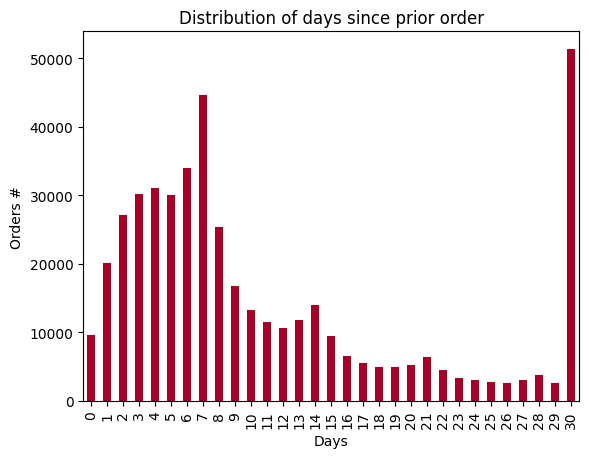

In [31]:
# Request 2

days_prior_max = round(instacart_orders['days_since_prior_order'].max())
days_prior_min = round(instacart_orders['days_since_prior_order'].min())

days_since_prior_order = instacart_orders.groupby(by='days_since_prior_order').count().reset_index()
days_since_prior_order['days_since_prior_order'] = days_since_prior_order['days_since_prior_order'].astype('int')

print("Customers typically take between {} and {} days to make another purchase".format(days_prior_min,days_prior_max))

days_since_prior_order.plot(x='days_since_prior_order',
                            y='order_id',
                            title='Distribution of days since prior order',
                            xlabel='Days',
                            ylabel='Orders #',
                            kind='bar',
                            colormap= 'RdYlBu',
                            legend=False,
                           )

REMARKS

- There are two peaks in this graph (day 7 and day 30), indicating the days with the highest number of purchases.
- A significant number of customers make a purchase again before day 9.

### Orders per day

<Axes: title={'center': 'Distribution of orders per day'}, ylabel='Orders #'>

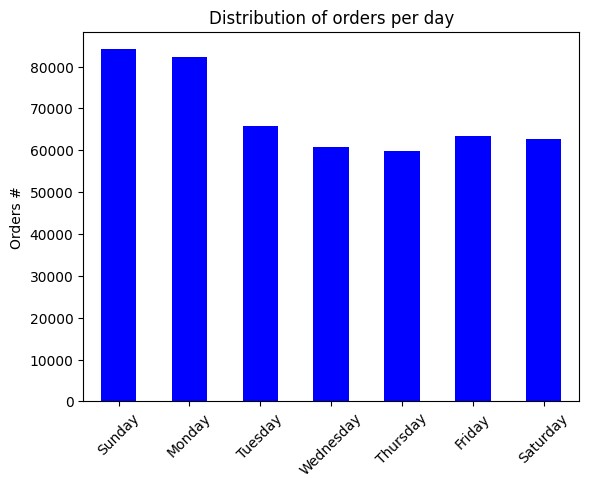

In [32]:
# Request 3
order_day = instacart_orders.groupby('order_dow').count().reset_index()
days= ['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']
order_day['days']= pd.Series(days)

order_day.plot(x='days',
               y='user_id',
               title='Distribution of orders per day',
               xlabel='',
               ylabel='Orders #',
               kind='bar',
               colormap = 'winter',
               legend=False,
               rot = 45
              )

REMARKS

- Sunday and Monday are the days when customers place the most orders.

## QUESTIONS 

1. Is there a difference between orders placed on Wednesday and Saturday?
2. How many orders has each customer placed?
3. What are the Top 20 best-selling products?
4. How many products are purchased per order by customers? 
5. What are the top 20 most reordered items?
6. What is the distribution of each item being reordered?
7. What is the proportion of ordered products that are reordered for each customer?
8. What are the top 20 items that people add to their carts first?

### Orders placed Wednesday and Saturday

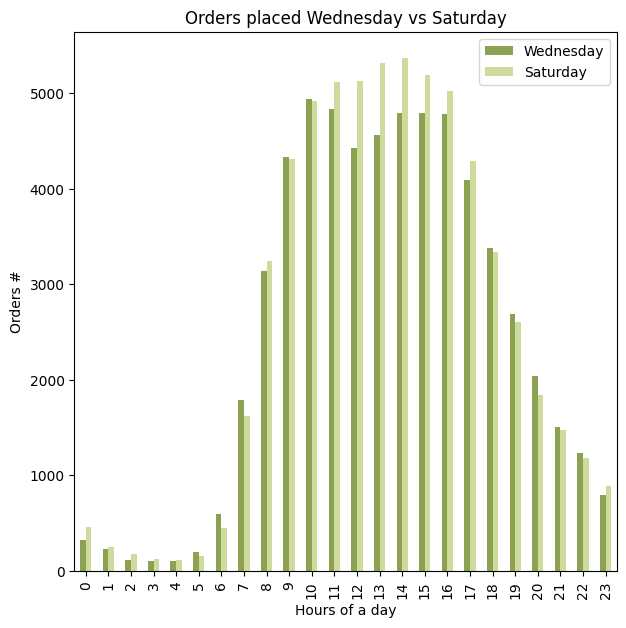

In [33]:
# Question 1

# Creation of a new data frame gathering data from Wednesday and Saturday
wed_df = instacart_orders[instacart_orders['order_dow'] == 4]
sat_df = instacart_orders[instacart_orders['order_dow'] == 6]

wed_grp = wed_df.groupby('order_hour_of_day').count()['user_id'].reset_index()
sat_grp = sat_df.groupby('order_hour_of_day').count()['user_id'].reset_index()

new_grp = wed_grp.merge(sat_grp,on='order_hour_of_day',how='left')

colormap = plt.cm.tab20b
colors = [colormap(5), colormap(7)]

new_grp.plot(x='order_hour_of_day',
            xlabel='Hours of a day',
            ylabel='Orders #',
            figsize=[7,7],
            title='Orders placed Wednesday vs Saturday',
            color=colors,
            kind='bar')

plt.legend(['Wednesday','Saturday'])


REMARKS

- There is an noticeable difference, with an increase in orders on Saturday between 11 AM and 5 PM.

### Orders per customer

<Axes: title={'center': 'Orders made by customer'}, xlabel='Orders', ylabel='Clients'>

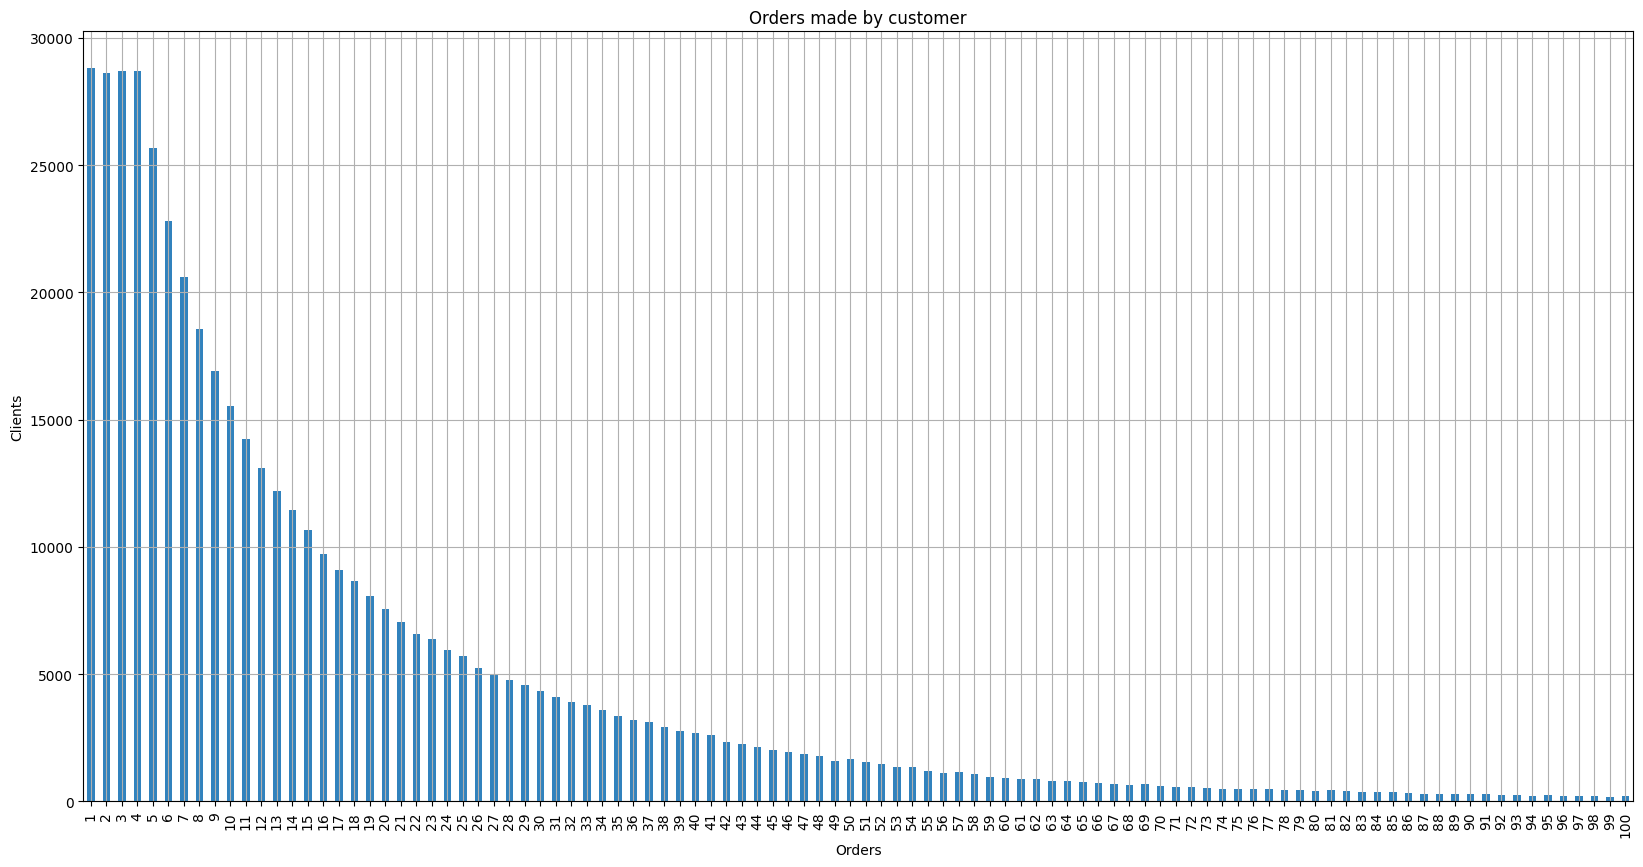

In [34]:
# Question 2
order_number_df = instacart_orders.groupby(by='order_number').count().reset_index()

order_number_df.plot(x='order_number',
                     y= 'user_id',
                    xlabel='Orders',
                    ylabel='Clients',
                    figsize=[20,10],
                    title='Orders made by customer',
                    legend=False,
                    grid=True,
                    colormap= 'tab20c',
                    kind='bar'
                    )

REMARKS

- We can clearly see a pattern here: as the number of orders increases, the number of customers placing those orders decreases. 

### 20 best-selling products

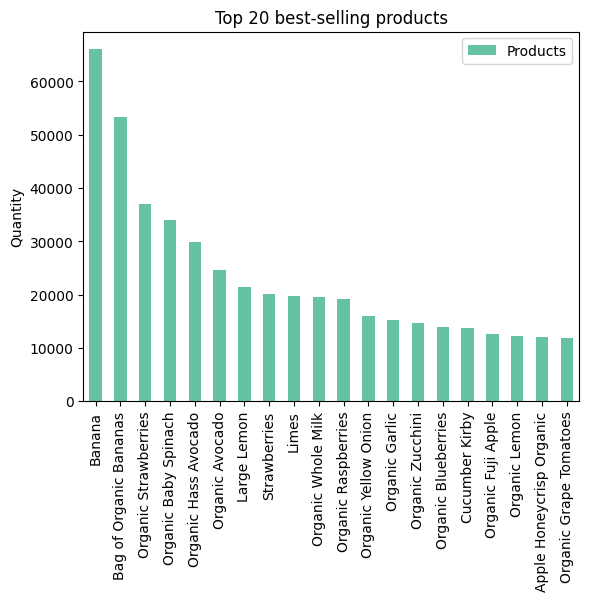

In [35]:
# Question 3

#Creatin of a new Data Frame with the top 20
new_products_name = order_products.merge(products,on='product_id',how='left')
products_grp = new_products_name.groupby('product_name').count().sort_values(by='order_id',ascending=False).reset_index()
top_20_products = products_grp.head(20)

top_20_products.plot(x='product_name',
                     y='order_id',
                     xlabel='',
                     ylabel='Quantity',
                     title='Top 20 best-selling products',
                     colormap='Set2',
                     kind='bar',
                    )

plt.legend(['Products'])

REMARKS

- There is a notable trend toward organic fruit, based on the top 20 products.

### Total items purchased per order

<Axes: title={'center': 'Total articles purchased in one order'}, xlabel="Product's quantity per order", ylabel='Clients #'>

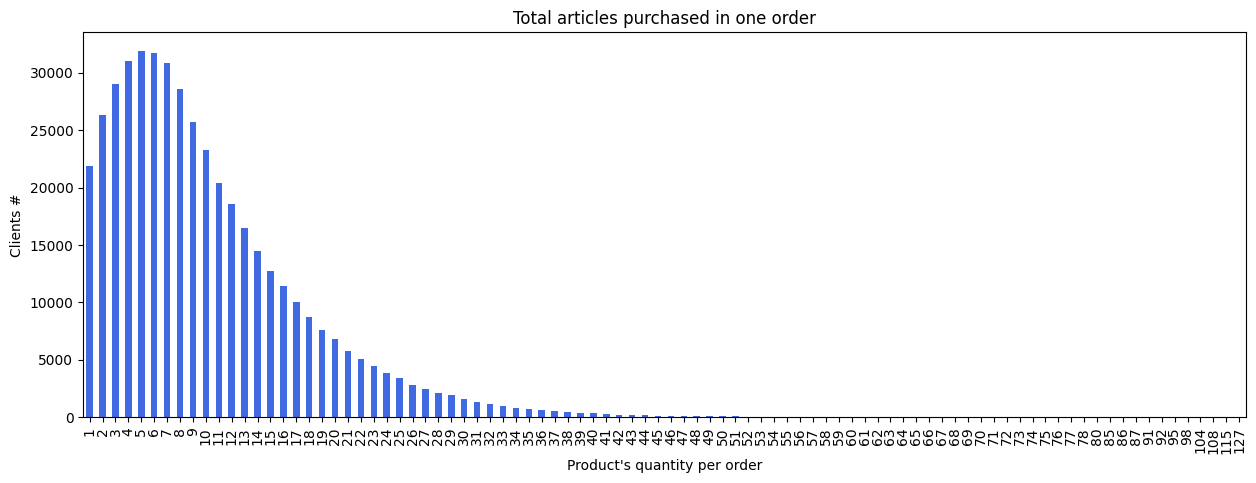

In [85]:
# Question 4
products_by_order = order_products.groupby('order_id').count().reset_index()
products_by_order = products_by_order.groupby('product_id').count().reset_index()

#Configuramos el gráfico de barras
products_by_order.plot(x='product_id',
                       y='order_id',
                       title='Total articles purchased in one order',
                       xlabel="Product's quantity per order",
                       ylabel='Clients #',
                       figsize=[15,5],
                       kind='bar',
                       color= 'royalblue',
                       legend=False,
                      )


REMARKS

- We can clearly see a pattern here as well: as the quantity of products purchased increases, the number of customers decreases. 

### 20 most reordered items

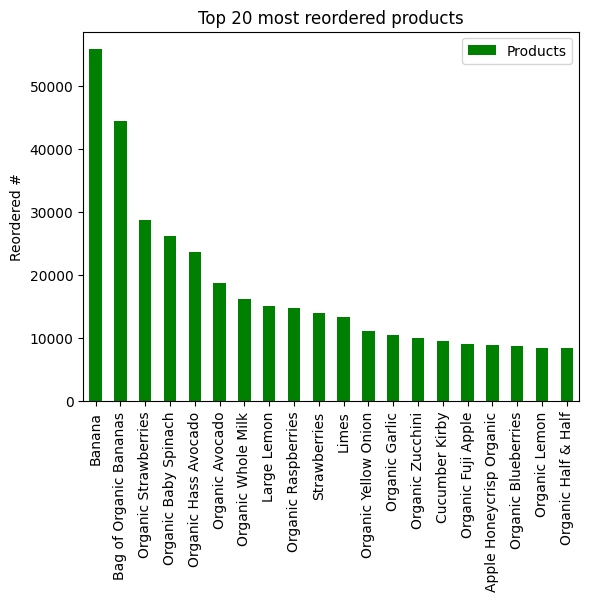

In [86]:
# Question 5
order_products_name = order_products.merge(products,on='product_id',how='left')
order_products_name = order_products_name[order_products_name['reordered']==1]
products_name_grp = order_products_name.groupby('product_name').count().sort_values(by='reordered',ascending=False).reset_index()
top_20_reordered_products = products_name_grp.head(20) 

top_20_reordered_products.plot(x='product_name',
                               y='order_id',
                               title='Top 20 most reordered products',
                               xlabel='',
                               ylabel='Reordered #',
                               colormap = 'ocean',
                               kind='bar',
                              )

#Cambiamos el nombre de la leyenda
plt.legend(['Products'])

REMAKRS

- The results align with those in Question 3, revealing a similar trend towards Organic fruit orders.

### Distribution of items reordered

In [69]:
# Question 6
products_grp = order_products.merge(products,on='product_id',how='left')

reordered_ratio = products_grp.groupby('product_name')['reordered'].mean().reset_index().sort_values(by='reordered',ascending=False)
print(f"Min value: {reordered_ratio['reordered'].min()} and Max value: {reordered_ratio['reordered'].max()}")
reordered_ratio.head(15)


Min value: 0.0 and Max value: 1.0


,product_name,reordered
26379,Organic Classic Kombucha Maqui Berry Mint,1.0
31675,Plant Based Mango Cashew Lucuma Paleo Print Co...,1.0
5249,Burger Veggie Curry,1.0
5253,Burgers- Chile Relleno,1.0
14781,G Series Fierce Strawberry Sports Drink,1.0
5272,Burrito- Pinto Bean Rice & Cheese,1.0
41942,Unscented Men's Anti-Perspirant & Deodorant Gel,1.0
14775,Fuzzy Navel Cooler,1.0
17749,Hershey's Chocolate Chunk Cookie Mix,1.0
41936,Unscented Liken Plant Natural Deodorant,1.0


REMARKS

- Due to the large number of products in the store, most have a reorder ratio of around 1%

### Distribution of customer reordering

In [74]:
# Question 7
user_reordered_grp = instacart_orders.merge(order_products,on='order_id',how='left')

reordered_ratio = user_reordered_grp.groupby('user_id')['reordered'].mean().reset_index().sort_values(by='reordered',ascending=False)
print(f"Min value: {reordered_ratio['reordered'].min()} and Max value: {reordered_ratio['reordered'].max()}")
reordered_ratio.head(15)


Min value: 0.0 and Max value: 1.0


,user_id,reordered
104933,137587,1.0
132334,173474,1.0
10651,13918,1.0
47419,62300,1.0
47426,62307,1.0
73494,96301,1.0
47428,62312,1.0
37065,48616,1.0
47431,62316,1.0
145863,191162,1.0


REMAKRS 
- Similar to the previous observation, most clients have a reorder ratio of around 1%

### 20 items people add first

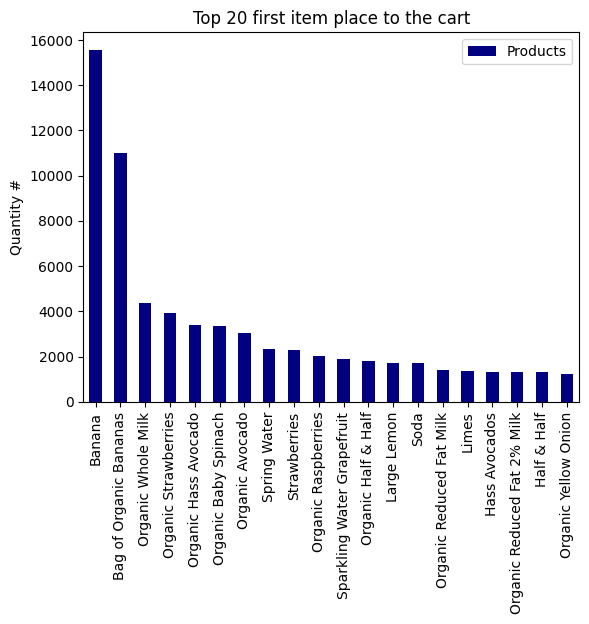

In [88]:
# Question 8

products_by_cart_order = instacart_orders.merge(order_products,on='order_id',how='left')
products_by_cart_order = products_by_cart_order.merge(products,on='product_id',how='left')
products_by_cart_order_n1 = products_by_cart_order[products_by_cart_order['add_to_cart_order'] == 1]
products_by_cart_order_n1_sort = products_by_cart_order_n1.groupby(by='product_name').count().sort_values('add_to_cart_order',ascending=False).reset_index()

top_20_first_cart_order = products_by_cart_order_n1_sort.head(20)[['product_name','add_to_cart_order']]
top_20_first_cart_order.plot(x='product_name',
                               y='add_to_cart_order',
                               title='Top 20 first item place to the cart',
                               xlabel='',
                               ylabel='Quantity #',
                               color='navy',
                               kind='bar',
                              )

#Cambiamos el nombre de la leyenda
plt.legend(['Products'])

REMARKS

- It seems that bananas are the first item picked in this store by customers.

We can perform more complex analyses when we have access to more data and DataFrames. Most of the time, the data we extract may contain duplicates of both types, missing values, or the data may be stored in other tables that we need to access through their primary and foreign keys. Using visualizations allows for better understanding, both for the analyst and the end client. Creating effective graphs and understanding the needs of what needs to be shown are essential foundations for projecting good results.